#### 🧠 Business Scenario
An automobile company wants to understand how engine size affects the price of a car.
From past observations, the product team believes:
For small engines, price increases slowly
For medium engines, price increases rapidly
For very large engines, price growth slows down due to luxury saturation
This indicates that the relationship between engine size and price is not strictly linear.
You are hired as a Data Analyst to analyze this pattern and build a model that can predict car prices accurately.
 
#### 📝 Tasks
1. Load the dataset and identify the relevant columns.
2. Use:
Engine size as the input feature
Car price as the output variable
3. Visualize the relationship between engine size and price.
4. Build a predictive model to estimate car price based on engine size.
5. Predict the price for a car with:
Engine size = 200
6. Increase the flexibility of your model and observe how the curve changes.
7. Compare predictions from:
a simple straight-line model
a curved model
8. Analyze which model:
captures the trend better
gives more realistic predictions
9. Evaluate prediction errors and interpret them in business terms.
10. Answer the following:
Why does a straight-line model fail here?
What risk occurs if the curve becomes too flexible?
Which model would you recommend for production and why?
 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\91934\OneDrive\Desktop\AI&DS-Tekworks\Machine_learning\CarPrice_Assignment.csv")
print(df.head())
print(df.shape)

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [3]:
X = df["enginesize"].values.reshape(-1,1)

y = df.iloc[:, -1].values


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lin_reg = LinearRegression()
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

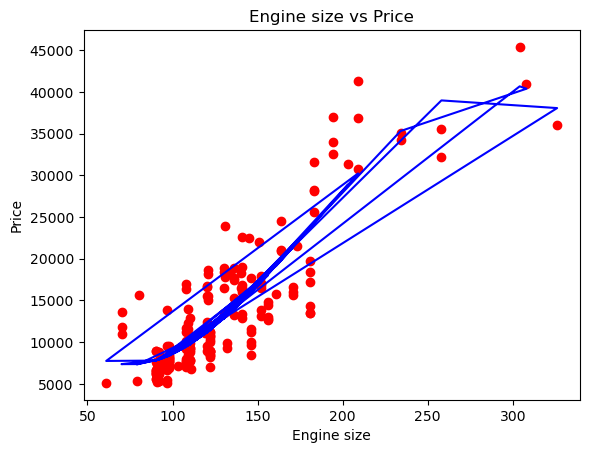

In [5]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Engine size vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=42)
# poly_reg = PolynomialFeatures(degree = 3)
X_train_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))

from sklearn.metrics import mean_squared_error,r2_score

print("MSE of Polynomial regression : ",mean_squared_error(y_test,y_pred))
print("R2 score of Polynomial regression is :",r2_score(y_test,y_pred))


MSE of Polynomial regression :  11059699.523006016
R2 score of Polynomial regression is : 0.8599045323538127


In [7]:
print("Prediction of car price for engine size 200",lin_reg_2.predict(poly_reg.fit_transform([[200]])))


Prediction of car price for engine size 200 [28207.4516369]


C:\Users\91934\AppData\Local\Temp\ipykernel_6344\3953737916.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


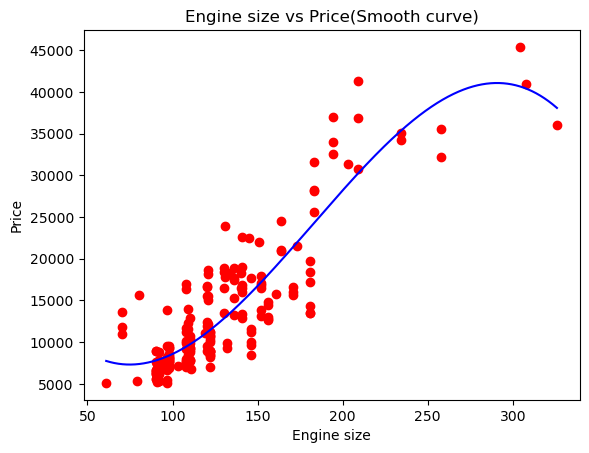

In [8]:
import numpy as np
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Engine size vs Price(Smooth curve)')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.show()

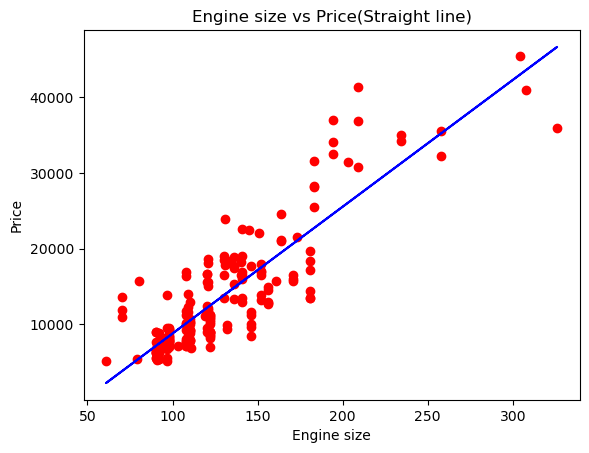

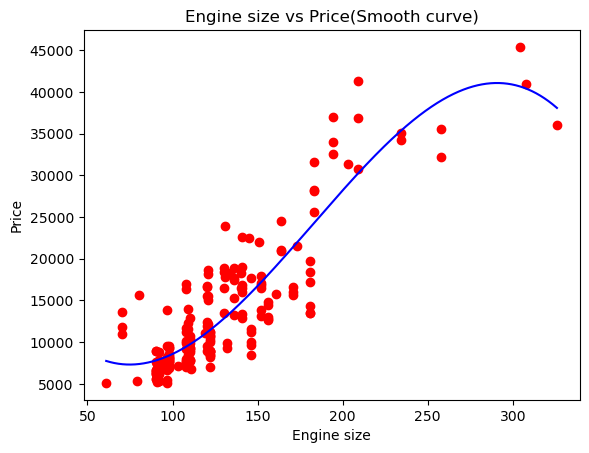

In [9]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
stra_lin = LinearRegression()
stra_lin.fit(X, y)


plt.scatter(X, y, color = 'red')
plt.plot(X, stra_lin.predict(X), color = 'blue')
plt.title('Engine size vs Price(Straight line)')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.show()
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Engine size vs Price(Smooth curve)')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.show()
 

Polynomial regression better captures the relationship of the variables


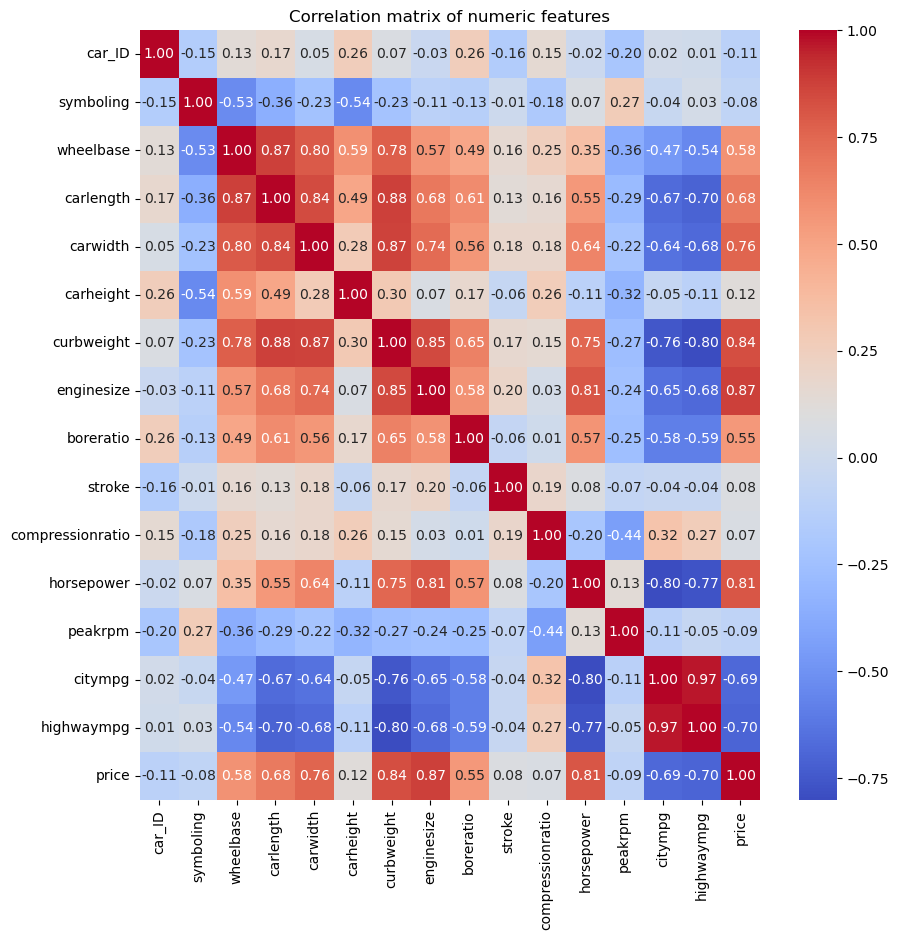

In [10]:
import seaborn as sns

num_col = df.select_dtypes("number").corr()
plt.figure(figsize=(10,10))
sns.heatmap(num_col, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Correlation matrix of numeric features")
plt.show()

stroke
compressionratio
peakrpm
symboling
car_ID


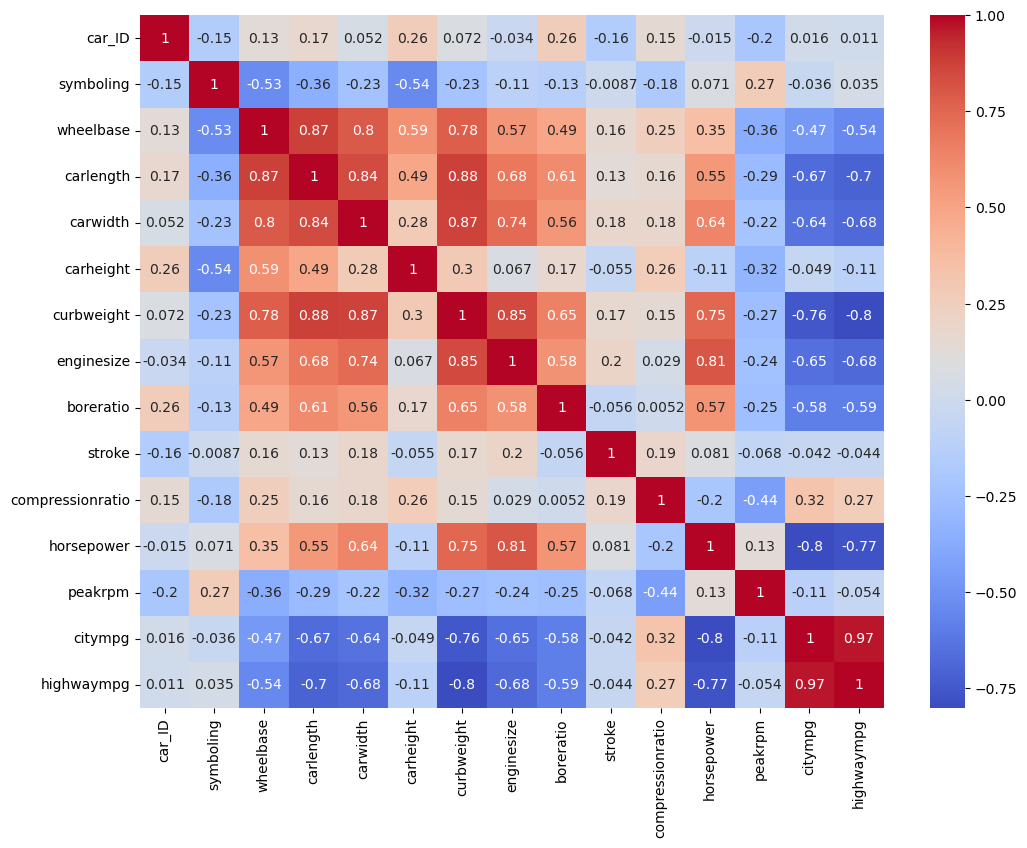

In [104]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

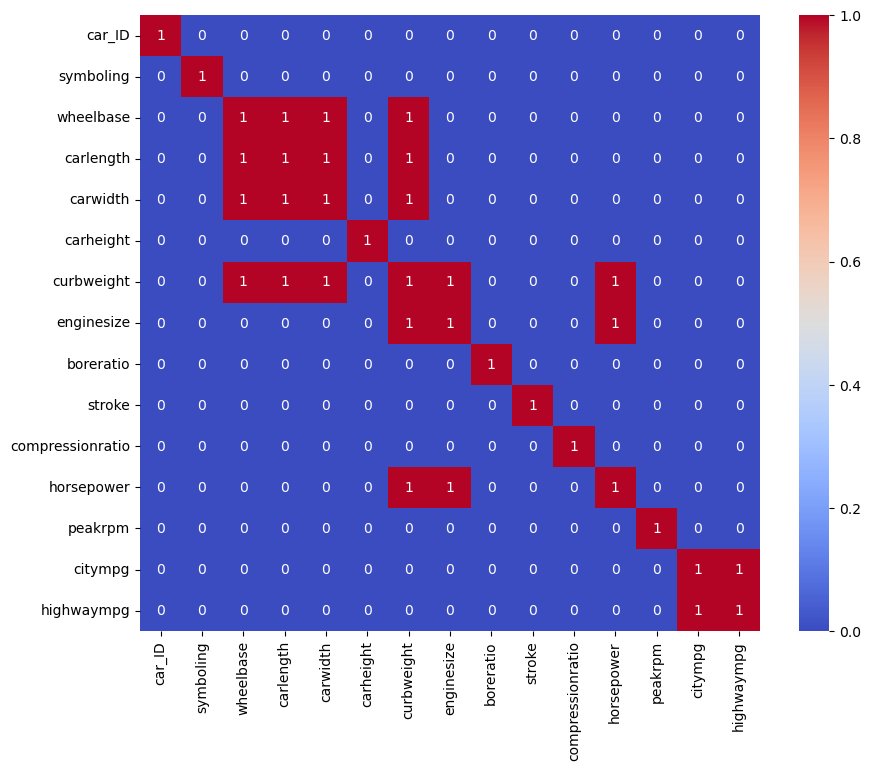

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(x.corr(numeric_only=True)>0.75, annot=True,cmap='coolwarm')
plt.show()

In [136]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
ridge=Ridge(2)
ridge=ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

15465498.544094885
0.8040953783229448


In [139]:
lasso=Lasso(2)
lasso=lasso.fit(X_train,y_train)
y_pred_1=lasso.predict(X_test)
print(mean_squared_error(y_test,y_pred_1))
print(r2_score(y_test,y_pred_1))

15465498.104154186
0.8040953838957633


In [138]:

 
alphas=np.arange(1,50,0.05)
model=RidgeCV(alphas=alphas) 
model.fit(X_train, y_train)
y_pred_2=model.predict(X_test)
print(mean_squared_error(y_test,y_pred_2))
print(r2_score(y_test,y_pred_2))


15466449.211160587
0.8040833360294929


In [134]:

alphas=np.arange(0.1,100,0.05)
model=RidgeCV(alphas=alphas)
model.fit(X_train, y_train)

print("Best alpha:", model.alpha_)

print("best score: ",model.score(X_test,y_test))
 

Best alpha: 99.95000000000003
best score:  0.8040707328228319


In [137]:

alphas=np.arange(0.1,100,0.05)
model=LassoCV(alphas=alphas)
model.fit(X_train, y_train)

print("Best alpha:", model.alpha_)

print("best score: ",model.score(X_test,y_test))
 

Best alpha: 99.95000000000003
best score:  0.8040710043011055
